In [2]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
currency_rate = pd.read_excel('RC_F24_08_2024_T24_09_2024.xlsx')
df = currency_rate.copy()
df['date'] = pd.to_datetime(df['date'])
df.head(3)
#clf = LocalOutlierFactor(n_neighbors=6)
#data_LOF=clf.fit_predict(data_with_zero)


,date,currency_rate,zero
0,2023-12-21,88.6825,0.0
1,2023-12-22,90.1821,0.0
2,2023-12-23,90.9782,0.0


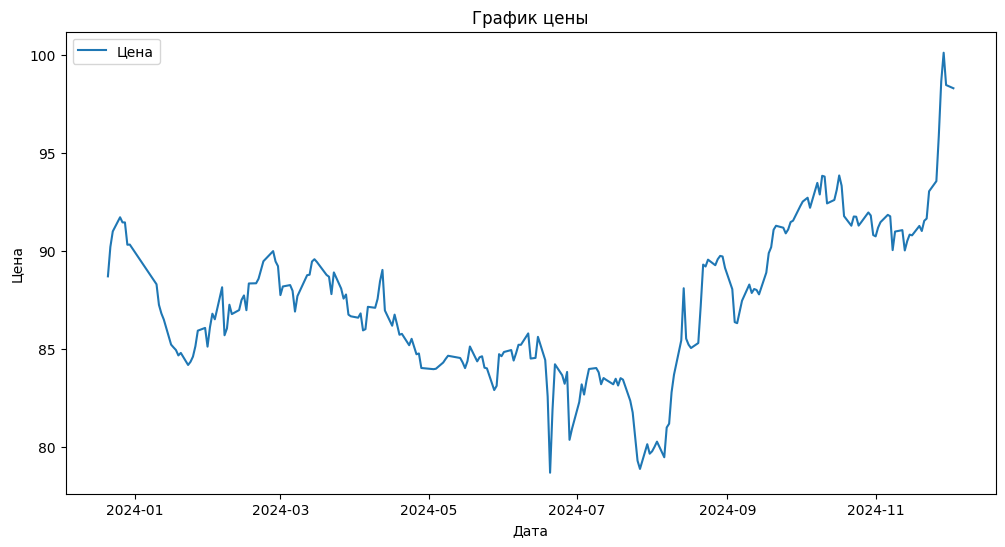

In [3]:
import matplotlib.pyplot as plt

# Задаём размер графика
plt.figure(figsize=(12, 6))

# Построение линейчатого графика временного ряда
plt.plot(df['date'], df['currency_rate'], label='Цена')

# Устанавливаем заголовки и легенду
plt.title('График цены')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

In [4]:
import numpy as np

df['time'] = np.arange(len(df.index))
df

,date,currency_rate,zero,time
0,2023-12-21,88.6825,0.0,0
1,2023-12-22,90.1821,0.0,1
2,2023-12-23,90.9782,0.0,2
3,2023-12-26,91.6976,0.0,3
4,2023-12-27,91.4362,0.0,4
...,...,...,...,...
231,2024-11-27,95.8540,NaN,231
232,2024-11-28,98.6276,NaN,232
233,2024-11-29,100.0926,NaN,233
234,2024-11-30,98.4446,NaN,234


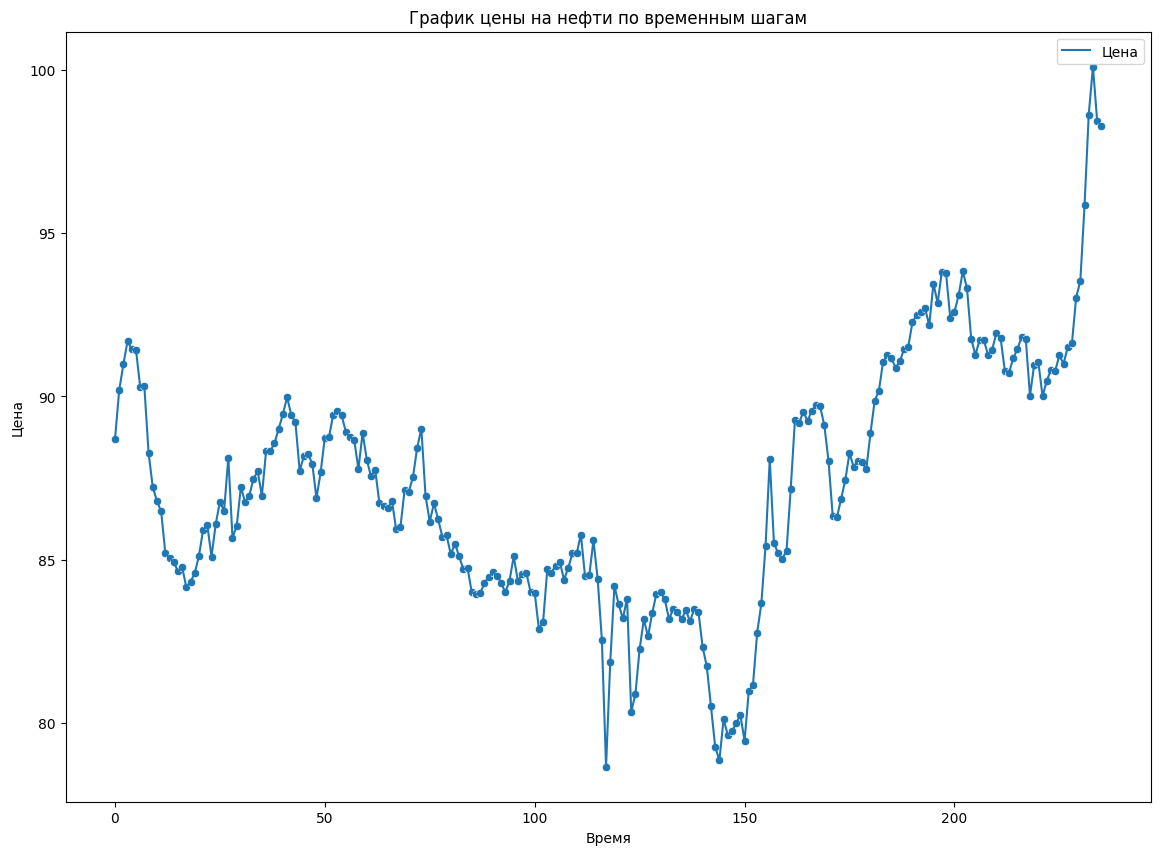

In [5]:
import seaborn as sns

# Задаём размер визуализации
fig, ax = plt.subplots(figsize=(14, 10))

# Построение линейчатого графика временного ряда
ax.plot(df['time'], df['currency_rate'], label='Цена')

# Добавление линии регрессии с помощью Seaborn
#sns.regplot(x='time', y='currency_rate', data=df, ci=None, scatter_kws=dict(color='0.25'), ax=ax)
sns.scatterplot(data=df, x="time", y="currency_rate")
ax.set_title('График цены на нефти по временным шагам')
ax.set_xlabel('Время')
ax.set_ylabel('Цена')
ax.legend()
plt.show() 

ADF-тест

In [6]:
from statsmodels.tsa.stattools import adfuller

# Исходный временной ряд
currency_rate['currency_rate']

# ADF-тест
result_adf = adfuller(currency_rate['currency_rate'])
print('ADF Test:')
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
print('Ряд стационарный.') if result_adf[1] <= 0.05 else print('Ряд не стационарный.')
print(f'Critical Values:')
for key, value in result_adf[4].items():
    print(f'   {key}: {value}')

ADF Test:
ADF Statistic: -0.7529847515805049
p-value: 0.8325440122824785
Ряд не стационарный.
Critical Values:
   1%: -3.4584868856997004
   5%: -2.873918902362675
   10%: -2.573367247623359


KPSS-тест

In [7]:
from statsmodels.tsa.stattools import kpss

# KPSS-тест
result_kpss = kpss(currency_rate['currency_rate'], regression='c')
print('KPSS Test:')
print(f'KPSS Statistic: {result_kpss[0]}')
print(f'p-value: {result_kpss[1]}')
print('Ряд стационарный.') if result_kpss[1] > 0.05 else print('Ряд не стационарный.')
print(f'Critical Values:')
for key, value in result_kpss[3].items():
    print(f'   {key}: {value}')

KPSS Test:
KPSS Statistic: 0.7493147638252654
p-value: 0.01
Ряд не стационарный.
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


C:\Users\artem\AppData\Local\Temp\ipykernel_5464\977724702.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(currency_rate['currency_rate'], regression='c')


88.6825   0
90.1821   1
78.6638   117
80.3429   123
80.8927   124
88.076   156
93.5402   230
95.854   231


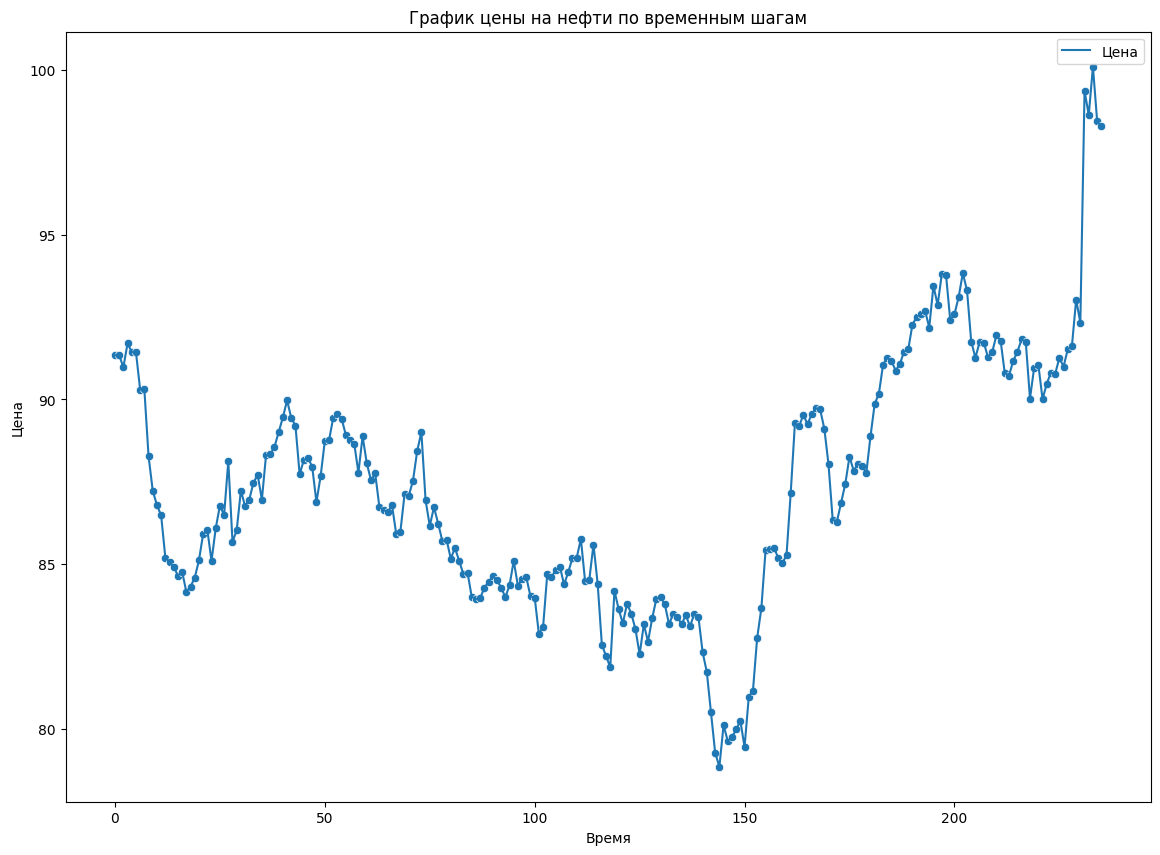

In [8]:
from sklearn.neighbors import LocalOutlierFactor

data = df.currency_rate.to_numpy()
time_ = df.time.to_numpy()
data_with_time = np.vstack((data, time_)).T

clf = LocalOutlierFactor(n_neighbors=3, contamination=0.03)
data_LOF=clf.fit_predict(data_with_time)

c = 0
for i in data:
    if data_LOF[c] == -1:
        print(data[c], ' ',c)
        data[c] = np.nan
    c += 1
from sklearn.impute import KNNImputer

data_with_time = np.vstack((data, time_)).T
imputer=KNNImputer(n_neighbors=2)
imputer.fit(data_with_time)
new_data = imputer.transform(data_with_time)
import seaborn as sns

columns = ['currency_rate','time' ]
new_df=pd.DataFrame.from_records(new_data, columns=columns)
# Задаём размер визуализации
fig, ax = plt.subplots(figsize=(14, 10))

# Построение линейчатого графика временного ряда
ax.plot(new_df['time'], new_df['currency_rate'], label='Цена')

# Добавление линии регрессии с помощью Seaborn
#sns.regplot(x='time', y='currency_rate', data=df, ci=None, scatter_kws=dict(color='0.25'), ax=ax)
sns.scatterplot(data=new_df, x="time", y="currency_rate")

ax.set_title('График цены на нефти по временным шагам')
ax.set_xlabel('Время')
ax.set_ylabel('Цена')
ax.legend()
plt.show() 


In [9]:
# import statistics
# average = sum(new_data)/new_data.size
from statsmodels.stats.diagnostic import acorr_ljungbox

# for k in range(1, 10):
#     Q = 0
#     rch = 0
#     rzn = 0
#     for t in range(k+1, new_data.size):
#         rch += (new_data.data[t-1] - average) * (new_data.data[t-k-1])
#         print(rch)
#     for t in range(1, new_data.size):
#         rzn += (new_data.data[t-1] - average) ** 2
#     Q = new_data.size * ((rch / rzn)**2)
#     print(Q)


# Создаем массив new_data размером 128x1


# Создаем массив для хранения значений
array = np.empty(new_data.shape[0])  # Теперь правильный размер

for i in range(0, new_data.shape[0]):  # Изменено на new_data.shape[0]
    array[i] = new_data[i][0]  # Доступ к первому элементу каждой строки


bp_test = acorr_ljungbox(array, lags=10, return_df=True, boxpierce=True)
print(bp_test)

        lb_stat      lb_pvalue      bp_stat      bp_pvalue
1    217.310657   3.491515e-49   214.571447   1.382151e-48
2    415.866573   4.962735e-91   409.790289   1.035546e-89
3    591.899020  5.748528e-128   582.124575  7.558694e-126
4    748.626253  1.028652e-160   734.900701  9.654268e-158
5    886.254451  2.511405e-189   868.481012  1.762800e-185
6   1013.837485  9.089658e-216   991.775540  5.372374e-211
7   1130.367612  8.028080e-240  1103.899066  4.231592e-234
8   1237.492047  7.594683e-262  1206.522474  3.736803e-255
9   1336.164806  4.775706e-282  1300.634727  2.256275e-274
10  1427.016024  1.456230e-300  1386.905211  6.663839e-292


Эллиптический фильтр

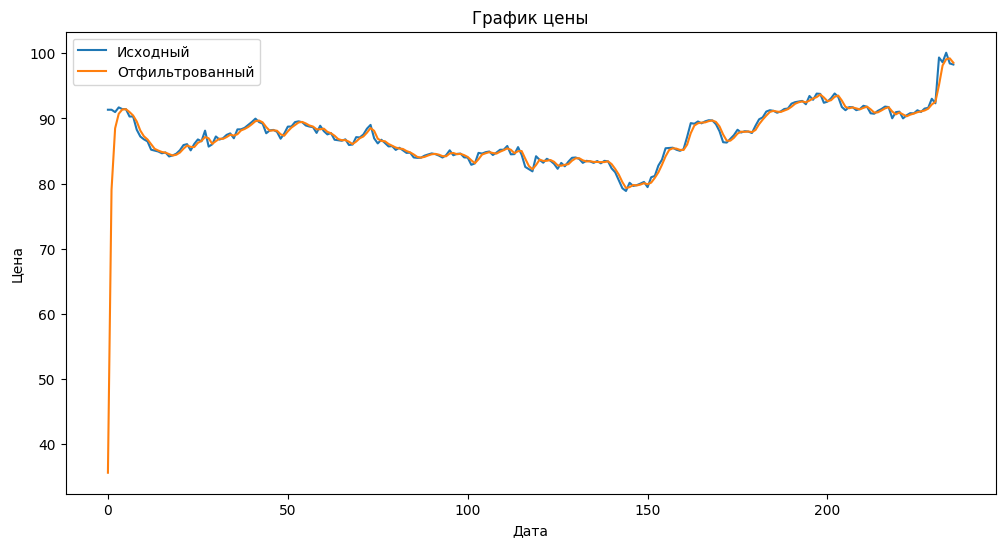

In [10]:
from scipy.signal import ellip, lfilter

fs = 1000  # Частота дискретизации
# Параметры эллиптического фильтра
order = 1  # Порядок фильтра
rp = 1  # Максимальная потеря в полосе пропускания (dB)
rs = 100  # Минимальное затухание в полосе задержки (dB)
cutoff = 100  # Частота среза (Гц)
noisysignal = new_df.currency_rate.to_numpy()

b, a = ellip(order, rp, rs, cutoff / (0.5 * fs), btype='low')
new_df['time'] = np.arange(len(new_df.index))
# Проектирование фильтра
b, a = ellip(order, rp, rs, cutoff / (0.5 * fs), btype='low')
time_ = new_df.time.to_numpy()
# Применение фильтра
filtered_signal = lfilter(b, a, noisysignal)
Filtered_signal = np.vstack((filtered_signal, time_)).T
noisy_signal = np.vstack((noisysignal, time_)).T
columns = ['currency_rate','time' ]
new_df=pd.DataFrame.from_records(Filtered_signal, columns=columns)
df = pd.DataFrame.from_records(noisy_signal, columns=columns)
print()
plt.figure(figsize=(12, 6))

# Построение линейчатого графика временного ряда
plt.plot(df['time'], df['currency_rate'], label='Исходный')
plt.plot(new_df['time'], new_df['currency_rate'], label='Отфильтрованный')
# Устанавливаем заголовки и легенду
plt.title('График цены')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

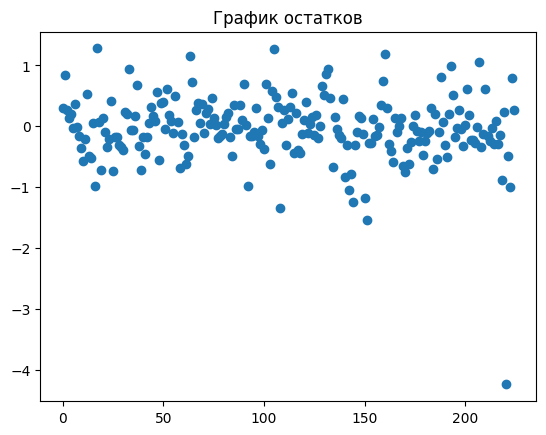

In [11]:
arr_new=np.delete(filtered_signal, [0,1,2,3,4,5,6,7,8,9,10])
arr_old=np.delete(noisysignal, [0,1,2,3,4,5,6,7,8,9,10])
arr_err = np.zeros_like(arr_new) 
for i in range(0, len(arr_new)):
    arr_err[i] = arr_new[i] - arr_old[i]
arr = np.empty(arr_err.size)
for i in range(0, arr_err.size):
    arr[i] = i
plt.scatter(arr, arr_err)
plt.title('График остатков')
plt.show()

Сглаживание значений ряда алгоритмом экспоненциального скользящего среднего

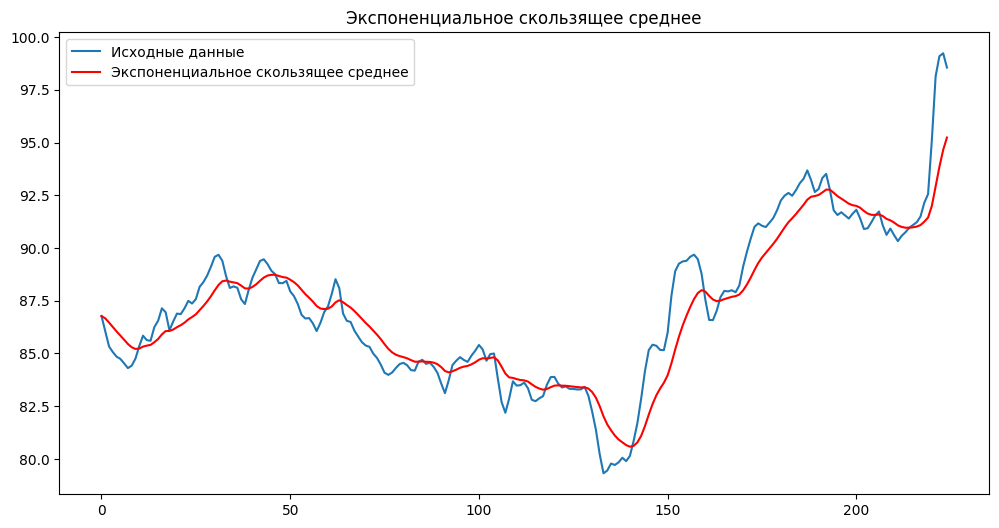

In [12]:

    
#
alpha = 0.15  # Коэффициент сглаживания
ema = np.zeros_like(arr_new)  # Массив для хранения значений EMA
ema[0] = arr_new[0]  # Начальное значение EMA

# Вычисление EMA
for i in range(1, len(arr_new)):
    ema[i] = alpha * arr_new[i] + (1 - alpha) * ema[i - 1]
to_exel = pd.DataFrame(ema)
to_exel.to_excel('filtered.xlsx')
# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(arr_new, label='Исходные данные')
plt.plot(ema, label='Экспоненциальное скользящее среднее', color='red')
plt.title('Экспоненциальное скользящее среднее')
plt.legend()
plt.show()

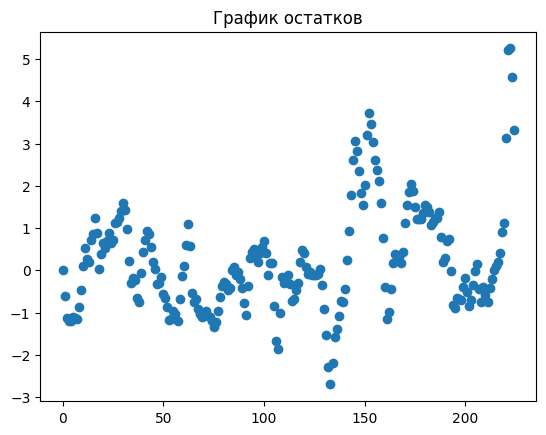

In [13]:
for i in range(0, len(arr_new)):
    arr_err[i] = arr_new[i] - ema[i]
arr = np.empty(arr_err.size)
for i in range(0, arr_err.size):
    arr[i] = i

plt.scatter(arr, arr_err)
plt.title('График остатков')
plt.show()

ADF тест

In [14]:
сurrency_rate = pd.DataFrame(ema, columns=['currency_rate'])# Исходный временной ряд


# ADF-тест
result_adf = adfuller(currency_rate['currency_rate'])
print('ADF Test:')
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
print('Ряд стационарный.') if result_adf[1] <= 0.05 else print('Ряд не стационарный.')
print(f'Critical Values:')
for key, value in result_adf[4].items():
    print(f'   {key}: {value}')

ADF Test:
ADF Statistic: -0.7529847515805049
p-value: 0.8325440122824785
Ряд не стационарный.
Critical Values:
   1%: -3.4584868856997004
   5%: -2.873918902362675
   10%: -2.573367247623359


KPSS тест

In [15]:
# KPSS-тест
result_kpss = kpss(currency_rate['currency_rate'], regression='c')
print('KPSS Test:')
print(f'KPSS Statistic: {result_kpss[0]}')
print(f'p-value: {result_kpss[1]}')
print('Ряд стационарный.') if result_kpss[1] > 0.05 else print('Ряд не стационарный.')
print(f'Critical Values:')
for key, value in result_kpss[3].items():
    print(f'   {key}: {value}')

KPSS Test:
KPSS Statistic: 0.7493147638252654
p-value: 0.01
Ряд не стационарный.
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


C:\Users\artem\AppData\Local\Temp\ipykernel_5464\2809083499.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(currency_rate['currency_rate'], regression='c')


Метод Валлиса-Мура

In [16]:
# arr_new=np.delete(filtered_signal, [0,1,2,3,4])
plus_minus=[]

for i in range(1, arr_new.size-1):
    if arr_new[i] != arr_new[i-1]:
        if arr_new[i] > arr_new[i-1]:
            plus_minus.append(1)
        else:
            plus_minus.append(0)
h = 0
for i in range(0, len(plus_minus)-1):
    if plus_minus[i] != plus_minus[i+1]:
        h += 1
h = h-2

import math
wallis_moor = (math.fabs(h-(2 * arr_new.size - 7)/(3)))/(math.sqrt((16 * arr_new.size - 29)/90))
t = 1.96    
if wallis_moor > t:
    print('Тренд есть')
else:
    print('Тренда нет')

Тренд есть


Защита

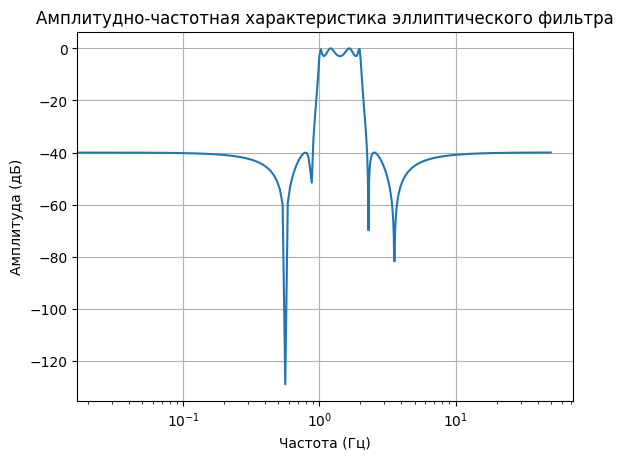

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ellip, freqz # Импорт freqz

# Параметры фильтра

order = 4  # Порядок фильтра
ripple = 3  # Максимальная пульсация в полосе пропускания (в дБ)
attenuation = 40  # Минимальное ослабление в полосе заграждения (в дБ)
low_cutoff = 1  # Нижняя граничная частота полосы пропускания (в Гц)
high_cutoff = 2  # Верхняя граничная частота полосы пропускания (в Гц)
fs = 100  # Частота дискретизации (в Гц)

#Расчет коэффициентов фильтра

# fs = 1000  # Частота дискретизации
# # Параметры эллиптического фильтра
# order = 2  # Порядок фильтра
# rp = 1  # Максимальная потеря в полосе пропускания (dB)
# rs = 100  # Минимальное затухание в полосе задержки (dB)
# cutoff = 200  # Частота среза (Гц)

b, a = ellip(order, ripple, attenuation, [low_cutoff, high_cutoff], fs=fs, btype='bandpass')
#b, a = ellip(order, rp, rs, cutoff / (0.5 * fs), btype='low')

# Создание частотной оси
w, h = freqz(b, a, worN=2048) # Используем freqz
freq = fs * w / (2 * np.pi)

# Построение амплитудно-частотной характеристики
plt.figure()
plt.semilogx(freq, 20 * np.log10(abs(h)))
plt.title('Амплитудно-частотная характеристика эллиптического фильтра')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда (дБ)')
plt.grid(True)
plt.show()